In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/weather_london_2023.csv", skiprows=10)
df.head()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,T2M
0,2023,1,1,0.6343,9.18
1,2023,1,2,1.0490,4.84
2,2023,1,3,0.2347,7.70
3,2023,1,4,0.6742,11.06
4,2023,1,5,0.6101,9.94


In [3]:
df["DATE"] = pd.to_datetime(
    dict(
        year=df["YEAR"],
        month=df["MO"],
        day=df["DY"]
    )
)
df = df.drop(columns=["YEAR", "MO", "DY"])

In [4]:
df.head()

,ALLSKY_SFC_SW_DWN,T2M,DATE
0,0.6343,9.18,2023-01-01
1,1.0490,4.84,2023-01-02
2,0.2347,7.70,2023-01-03
3,0.6742,11.06,2023-01-04
4,0.6101,9.94,2023-01-05


In [5]:
df = df.replace(-999, pd.NA)
df = df.dropna()


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ALLSKY_SFC_SW_DWN  365 non-null    float64       
 1   T2M                365 non-null    float64       
 2   DATE               365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


In [7]:
df = df.set_index("DATE")

In [8]:
df.head()

,ALLSKY_SFC_SW_DWN,T2M
DATE,,
2023-01-01,0.6343,9.18
2023-01-02,1.0490,4.84
2023-01-03,0.2347,7.70
2023-01-04,0.6742,11.06
2023-01-05,0.6101,9.94


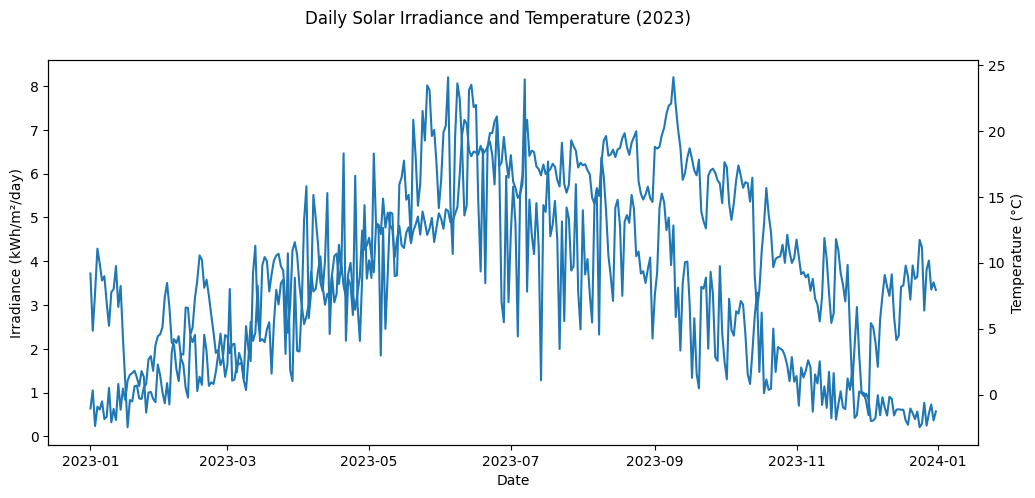

In [9]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.plot(df.index, df["ALLSKY_SFC_SW_DWN"], label="Irradiance")
ax1.set_ylabel("Irradiance (kWh/m²/day)")
ax1.set_xlabel("Date")

ax2 = ax1.twinx()
ax2.plot(df.index, df["T2M"], label="Temperature")
ax2.set_ylabel("Temperature (°C)")

fig.suptitle("Daily Solar Irradiance and Temperature (2023)")
plt.show()


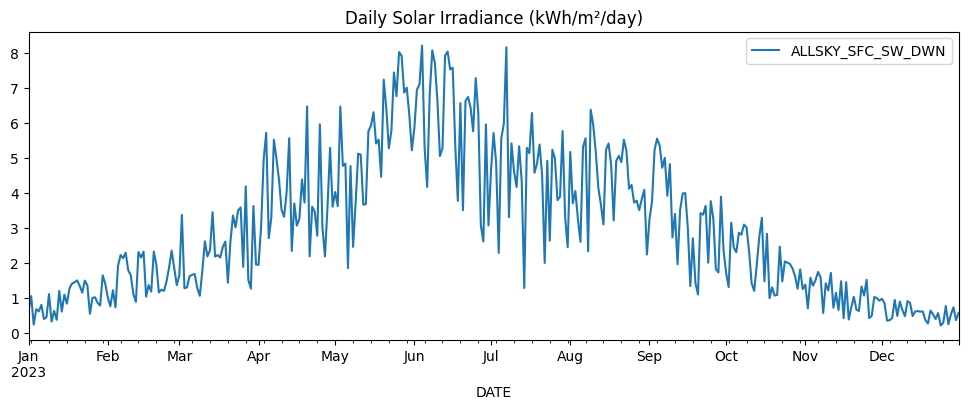

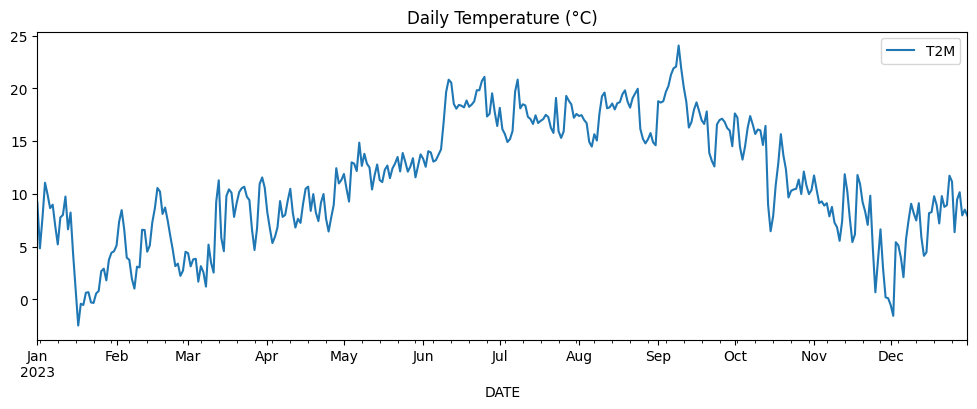

In [10]:
df[["ALLSKY_SFC_SW_DWN"]].plot(
    figsize=(12,4),
    title="Daily Solar Irradiance (kWh/m²/day)"
)
plt.show()

df[["T2M"]].plot(
    figsize=(12,4),
    title="Daily Temperature (°C)"
)
plt.show()


In [12]:
df.to_csv(
    "../data/weather_london_2023_cleaned.csv",
)
